<a href="https://colab.research.google.com/github/hima9/TimeSeries/blob/master/timeseries_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#A date in Python is not a data type of its own, but we can import a module named datetime to work with dates as date objects.
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

In [3]:
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

start=datetime.date(2017,1,1)
end=datetime.date(2020,7,2)
url=f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'
result=requests.get(url)
result.content

b'{"bpi":{"2017-01-01":997.6888,"2017-01-02":1018.05,"2017-01-03":1030.8175,"2017-01-04":1129.87,"2017-01-05":1005.815,"2017-01-06":895.67,"2017-01-07":905.17,"2017-01-08":913.5238,"2017-01-09":899.35,"2017-01-10":904.7925,"2017-01-11":775.9813,"2017-01-12":802.8288,"2017-01-13":826.1213,"2017-01-14":818.6388,"2017-01-15":822.4225,"2017-01-16":830.2638,"2017-01-17":904.4538,"2017-01-18":884.2513,"2017-01-19":898.0213,"2017-01-20":891.6238,"2017-01-21":920.0113,"2017-01-22":925.3313,"2017-01-23":912.6875,"2017-01-24":885.6475,"2017-01-25":894.11,"2017-01-26":915.1,"2017-01-27":918.5625,"2017-01-28":920.28,"2017-01-29":914.0438,"2017-01-30":920.2413,"2017-01-31":967.6675,"2017-02-01":987.3463,"2017-02-02":1007.795,"2017-02-03":1018.1113,"2017-02-04":1033.6525,"2017-02-05":1013.9938,"2017-02-06":1024.6125,"2017-02-07":1052.5388,"2017-02-08":1054.3438,"2017-02-09":988.9475,"2017-02-10":993.0788,"2017-02-11":1010.0025,"2017-02-12":999.5125,"2017-02-13":996.8575,"2017-02-14":1009.2513,"2017-

In [4]:
data=pd.read_json(result.content).iloc[:-2,:1]
data.index.name='date'
data.index=pd.to_datetime(data.index)
data

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2020-06-28,8991.5000
2020-06-29,9096.1500
2020-06-30,9144.3850


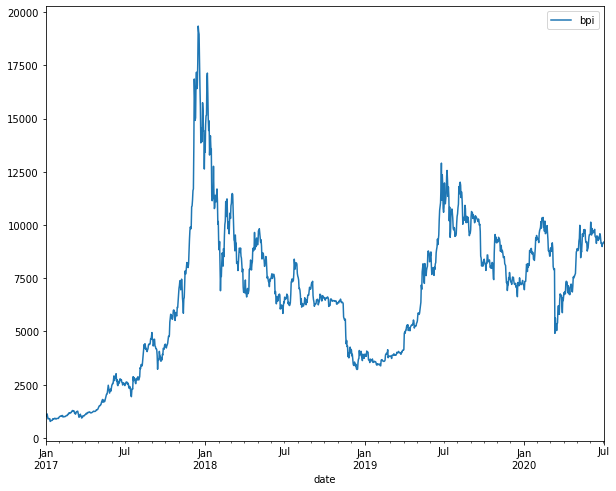

In [5]:
data.plot()

D calendar day

B Business day

W weekly

M month

Q quarter

A year end

H hours

T Minutes

S seconds

In [6]:
print(type(data))
data.resample('Q').mean() #resample() function is used to resample time-series data.

<class 'pandas.core.frame.DataFrame'>


,bpi
date,
2017-03-31,1034.169242
2017-06-30,1919.658520
2017-09-30,3506.611449
2017-12-31,9413.347972
2018-03-31,10468.423818
2018-06-30,7747.165877
2018-09-30,6798.307918
2018-12-31,5169.904503
2019-03-31,3781.639959


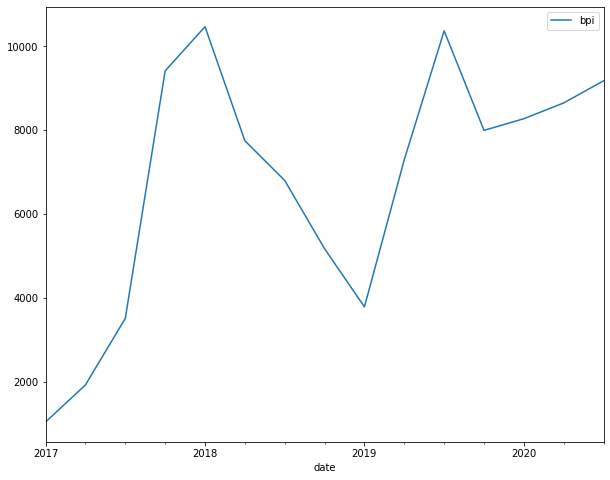

In [7]:
data.resample('Q').mean().plot()

In [8]:
data.resample('M').mean()

,bpi
date,
2017-01-31,911.259258
2017-02-28,1064.382100
2017-03-31,1129.790194
2017-04-30,1218.319247
2017-05-31,1884.280513
2017-06-30,2657.555067
2017-07-31,2533.259458
2017-08-31,3914.709377
2017-09-30,4090.707313


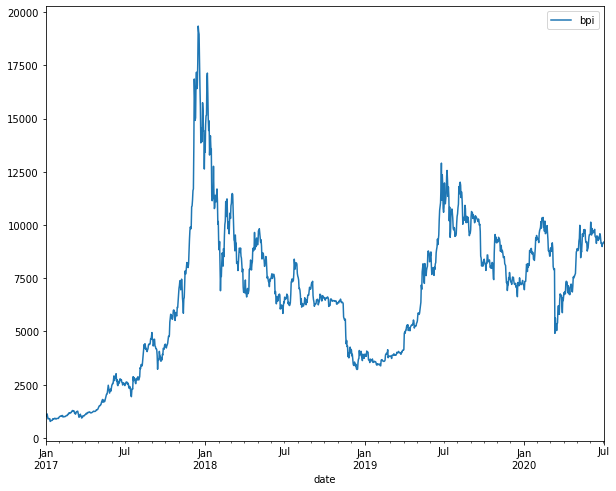

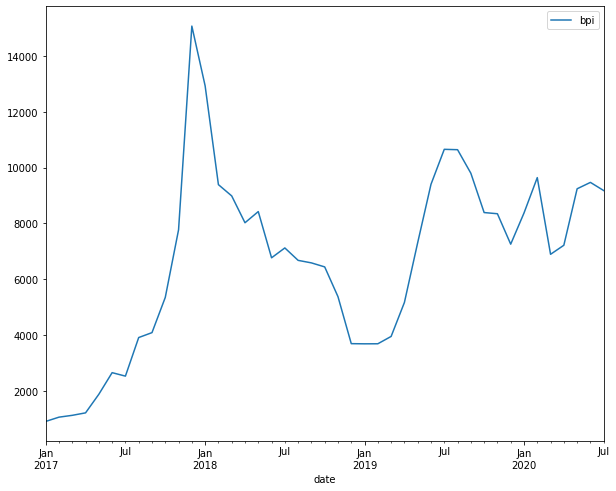

In [9]:
data.plot()
data.resample('M').mean().plot()

In [10]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [11]:
data[:5].diff()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


In [12]:
data[:5].diff(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


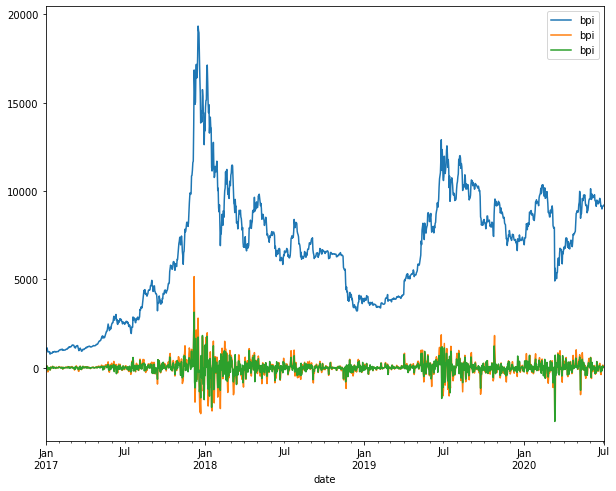

In [13]:
pd.concat([data['bpi'],data['bpi'].diff(2),data['bpi'].diff()],axis=1).plot()

In [14]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [16]:
data[:5].shift()#The shift() function is used to shift index by desired number of periods with an optional time freq.

,bpi
date,
2017-01-01,NaN
2017-01-02,997.6888
2017-01-03,1018.0500
2017-01-04,1030.8175
2017-01-05,1129.8700


In [17]:
data[:5].tshift(2) #tshift() function is used to shift the time index, using the index's frequency if available.

,bpi
date,
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175
2017-01-06,1129.8700
2017-01-07,1005.8150


In [ ]:
data[:5]-data[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


In [ ]:
data[:5]-data[:5].shift(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


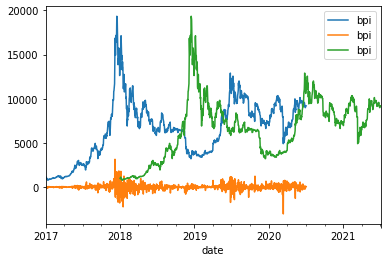

In [ ]:
pd.concat([data,data-data.shift(),data.tshift(365)],axis=1).plot()

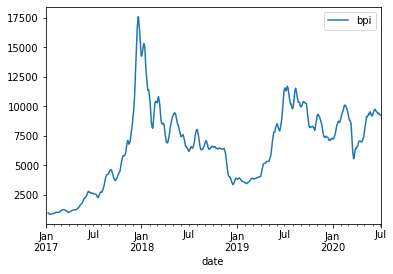

In [ ]:
data.rolling(window=10).mean().plot()

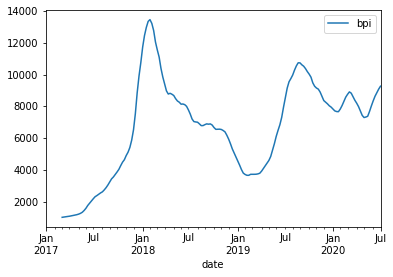

In [ ]:
data.resample('W').mean().rolling(window=10).mean().plot()

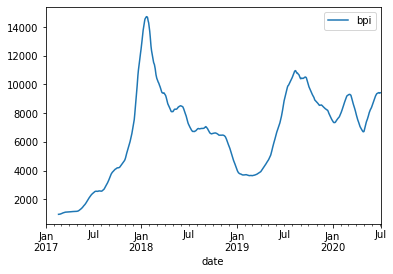

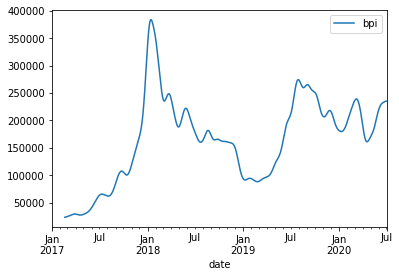

In [ ]:
data.rolling(window=50).mean().plot()
data.rolling(window=50,win_type='gaussian').sum(std=10).plot()

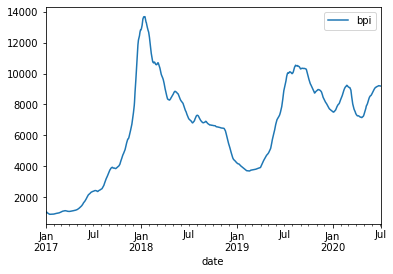

In [ ]:
data.ewm(span=50).mean().plot()

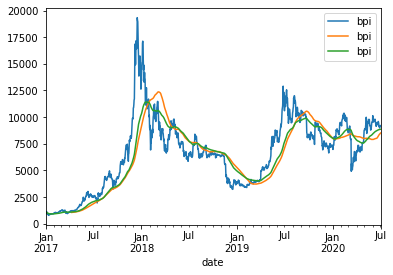

In [ ]:
pd.concat([data,data.rolling(window=100).mean(),data.ewm(span=100).mean()],axis=1).plot()

In [ ]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

In [ ]:
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

start=datetime.date(2017,1,1)
end=datetime.date(2020,7,2)
url=f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'
result=requests.get(url)
result.content

b'{"bpi":{"2017-01-01":997.6888,"2017-01-02":1018.05,"2017-01-03":1030.8175,"2017-01-04":1129.87,"2017-01-05":1005.815,"2017-01-06":895.67,"2017-01-07":905.17,"2017-01-08":913.5238,"2017-01-09":899.35,"2017-01-10":904.7925,"2017-01-11":775.9813,"2017-01-12":802.8288,"2017-01-13":826.1213,"2017-01-14":818.6388,"2017-01-15":822.4225,"2017-01-16":830.2638,"2017-01-17":904.4538,"2017-01-18":884.2513,"2017-01-19":898.0213,"2017-01-20":891.6238,"2017-01-21":920.0113,"2017-01-22":925.3313,"2017-01-23":912.6875,"2017-01-24":885.6475,"2017-01-25":894.11,"2017-01-26":915.1,"2017-01-27":918.5625,"2017-01-28":920.28,"2017-01-29":914.0438,"2017-01-30":920.2413,"2017-01-31":967.6675,"2017-02-01":987.3463,"2017-02-02":1007.795,"2017-02-03":1018.1113,"2017-02-04":1033.6525,"2017-02-05":1013.9938,"2017-02-06":1024.6125,"2017-02-07":1052.5388,"2017-02-08":1054.3438,"2017-02-09":988.9475,"2017-02-10":993.0788,"2017-02-11":1010.0025,"2017-02-12":999.5125,"2017-02-13":996.8575,"2017-02-14":1009.2513,"2017-

In [ ]:
data=pd.read_json(result.content).iloc[:-2,:1]
data.index.name='date'
data.index=pd.to_datetime(data.index)
data

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2020-06-28,8991.5000
2020-06-29,9096.1500
2020-06-30,9144.3850


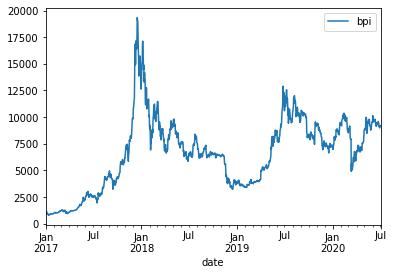

In [ ]:
data.plot()

In [ ]:
data.groupby(data.index.dayofweek).mean()

,bpi
date,
0,6612.779266
1,6612.821919
2,6615.719704
3,6595.242466
4,6621.517746
5,6636.877807
6,6588.415989


In [ ]:
data.groupby(data.index.month).mean()

,bpi
date,
1,6474.960095
2,5979.032653
3,5241.117152
4,5408.169478
5,6715.698325
6,7074.233533
7,6820.423568
8,7077.441969
9,6825.175222


In [ ]:
data.groupby(data.index.year).mean()

,bpi
date,
2017,3990.138147
2018,7529.385702
2019,7379.960562
2020,8468.953262


In [ ]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [ ]:
data[:5].cumsum()

,bpi
date,
2017-01-01,997.6888
2017-01-02,2015.7388
2017-01-03,3046.5563
2017-01-04,4176.4263
2017-01-05,5182.2413


In [ ]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [ ]:
data[:5].pct_change(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,0.033205
2017-01-04,0.109837
2017-01-05,-0.024255


In [ ]:
data[:5].expanding().sum()

,bpi
date,
2017-01-01,997.6888
2017-01-02,2015.7388
2017-01-03,3046.5563
2017-01-04,4176.4263
2017-01-05,5182.2413


In [ ]:
data[:5].expanding().mean()

,bpi
date,
2017-01-01,997.688800
2017-01-02,1007.869400
2017-01-03,1015.518767
2017-01-04,1044.106575
2017-01-05,1036.448260
